<a href="https://colab.research.google.com/github/Epilef86/DNC/blob/main/Clusteriza%C3%A7%C3%A3o_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A maioria dos métodos aplicados são para variáveis contínuas. As principais métrias para medidas de distâncias (dissimilaridade) utilizadas são:

1- Euclidiana;
2- Quadrática Euclidiana;
3- Minkowski;
4- manhattan;
5- Chebychev;
6- Canberra



Diferença entre métodos supervisionados (classificação) e não supervisionados (clusterização)

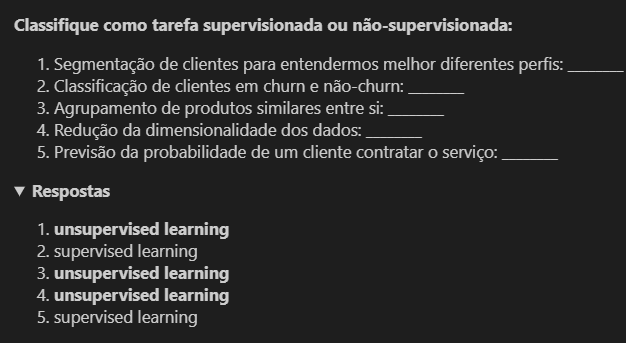

Vamos instalar a biblioteca Kmodes, ela é similar ao K means, porém ela é específica para dados categóricos.

In [15]:
%%capture
%pip install kmodes

Adicionar bibliotecas de Data Wrangling

In [16]:
# Data wrangling
import numpy as np
import pandas as pd

Bibliotecas de visualização de dados

In [17]:
# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

Dentro de machine learning, vou começar com KMeans

In [18]:
## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster



De scipy

In [19]:
from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

Para fins didáticos utilizarei as bibliotecas abaixo

In [20]:
# Didatic purposes
import string
from ipywidgets import interact

A célula abaixo vai estar configurando nossas figuras, é só pra deixar os gráficos estaticamente mais atraentes

In [21]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

KMeans:
Características:

1- mais utilizado na indústria;
2- requer uma pré-especificação da quantidade de grupos (K). Caso as variáveis estejam na mesma escala não precisa fazer uma escalonização, do contrário sim. Precisa informar ao modelo quantos grupos são necessários colocar nas observações.

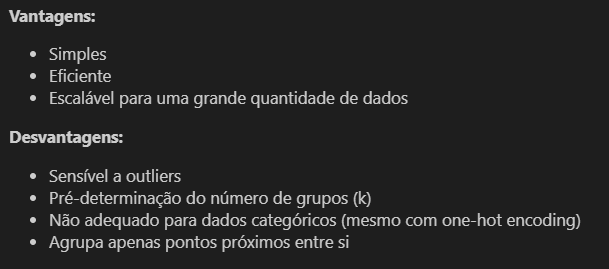

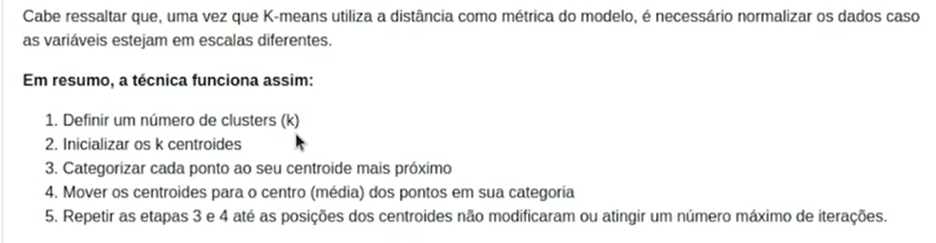

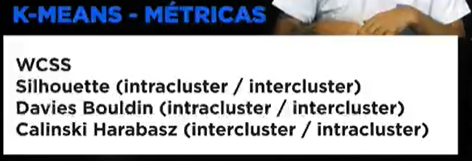

WCSS - soma dos quadrados dentro do clustering. Soma da variância que tem no clustering. Se tiver dois clustering, pega a variância de um clustering, pega a variância do outro e soma, assim por diante. Conforme aumenta a quantidade de clustering, diminui a variância. Por exemplo

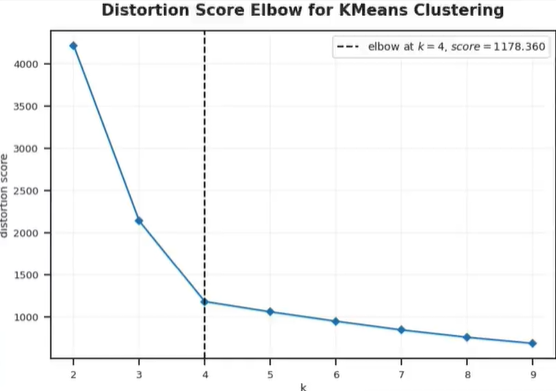

No gráfico acima, um ponto idealmente pra se cortar sera o ponto 4 pq de 2 para 3 tem uma queda muito grande da variância, do 3 pro 4 também, porém do 4 pro 5 não tem uma queda muito grande. Esse é o Método do Cotovelo

Uma das métricas mais utilizadas é a silhouette. Pra cada observação tem o coeficiente de silhouette, e o coeficiente é calculado

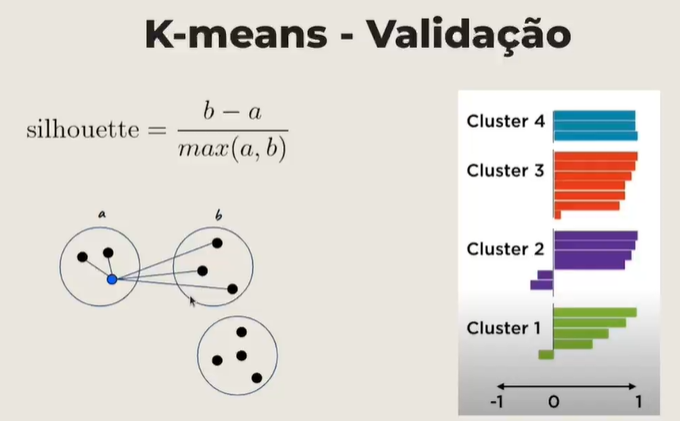

Ou seja, acima temos 3 clustering, digamos que eu quero calcular o coeficiente pro ponto azul, o "a" é a distância da observação alvo com as distância dentro do mesmo clustering, ou seja digamos que a distância do ponto azul ao preto é 3 e ao outro preto é 5, então o valor de "a" vai ser a média a = 3+5/2= 4. Daí vou comparar com os clustering que estão mais próximos daquela observação, pro "b" a distância do ponto azul ao preto é 6 e ao outro preto é 9, e do outro é 7 então o valor de "a" vai ser a média a = 6+7+9/3= 7.33. Pra normalizar, ou seja, ficar entre -1 e 1, dividimos pelo máximo entre a distância "a" e "b", no caso do exeplo é 9. Repete isso pra todas as bolinhas dentro do clustering, daí teremos um coeficiente de silhouette pra cada bolinha, tiramos a média de cada uma e tira a média com as demais que vai ser o coeficiente de silhouette geral. Que varia de -1 a 1, 1 é o coeficiente mais bem alocado

O que se costuma fazer é um gráfico pra cada clustering gerado, como pode ver lá em cima nas figuras a direita: clustering 1,2,3,4.

PRÁTICA trabalhando com simulação de dados pra fins acadêmicos

.make_blobs pede o tamnho da amostra que eu quero (n_samples), n_features por padrão é 2, centers - quantos grupos vou trabalhar, cluster_std - desvio padrão o pdrão é 1, mas irei colocar 0.8. Tudo isso vai retornar um array X e y, que são as variáveis e o target.

Em seguida coloca tudo isso dentro de um dataframe

.ascii_uppercase retorna todas as letras do alfabeto, mas só queremos a quantidade de colunas que temos :X.shape[1]. DEpois vou fazer uma lista disso tudo.

In [22]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-6.497469,4.171017
1,-6.922364,1.985771
2,10.138752,-1.122802
3,-8.053432,3.120333
4,-6.020134,0.997156


Criamos acima um dataset sintético

Agora vamos plotar pra saber como está a distribuição

**scatter_kwargs - vou passar como se fosse funções do dicionário, pega toda formatação que já tem dentro da biblioteca.

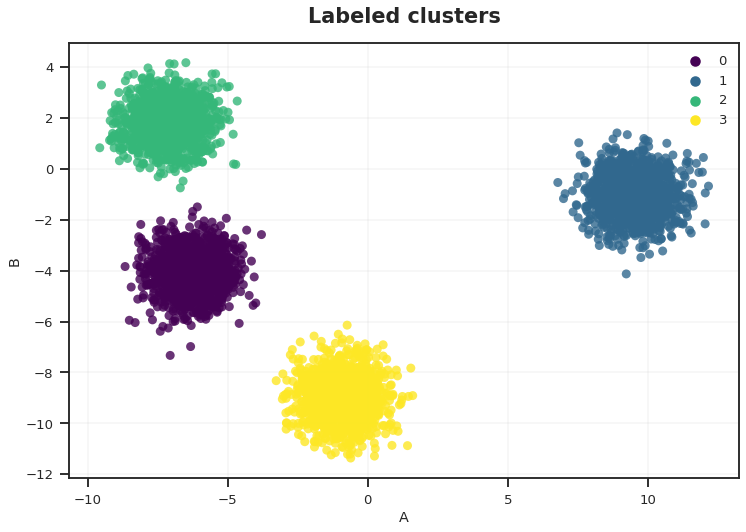

In [23]:
# Visualize simulated clusters
sns.scatterplot(data=df, x='A', y='B', hue=y, **scatter_kwargs)
plt.title('Labeled clusters')
plt.show()

Agora vamos aplicar o Kmeans. No sklearn, podemos utilizar algoritmos de clusterização através de classes ou funções.

---



k_means:
X são as variváveis de entrada, numéricas, contínuas, padronizadas
n_clusters quantidade de clustering

In [24]:
# Usando função
centroids, labels, intertia = k_means(X, n_clusters=4)

Para plotar o gráfico e colorindo por labels, hue=labels

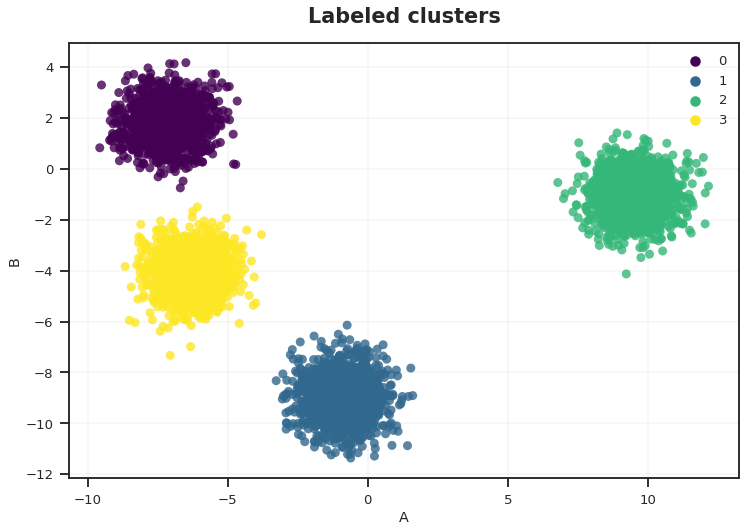

In [25]:
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
plt.title('Labeled clusters')
plt.show()

Por Classes

A diferença entre classes e funções é que a classe vai ser utilizada em pipelines

In [26]:
# Using KMeans
model = KMeans(n_clusters=4)
model.fit(X)

centroids = model.cluster_centers_
labels = model.labels_
inertia = model.inertia_

Depois que eu dou .fit, eu consigo acessar algumas variáveis, por exemplo centroids
.cluster_centers_, sempre termina com "_", pois os atributos foram criados após o .fit.

Para colocar aonde fica o centroides, usamos .scatterplot(x=centroids[:,0], y=centroids[:,1], marker='*', s=500, color='black', ax=ax)

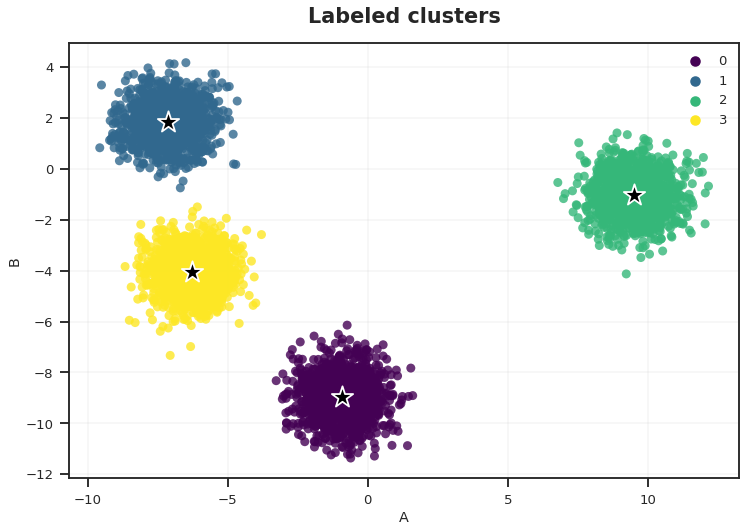

In [27]:
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker='*', s=500, color='black', ax=ax)

plt.title('Labeled clusters')
plt.show()

Os centroides vão ajudar bastante a interpretar os clustering pq é a medida central do clustering. 

Avaliando os modelos de clustering, uma boa valiação vai produzir alta similaridade dentro do cluster, pouca similaridade entre os clustering.

Passei os labels que são produzidos pelos Kmeans

In [28]:
# sklearn metrics
silhouette_score(X, labels)


0.8013630564275173

O silhouette 0.84 é próximo de 1, o que é ótimo

In [29]:
davies_bouldin_score(X, labels)


0.2777899382406871

Davies dá 0.28, quanto menos melhor

In [30]:
calinski_harabasz_score(X, labels)

76298.6389279286

Quanto mais o Calinski é melhor porém não está normalizado

A métrica sozinha não quer dizer nada, 

Vamos passar quantos grupos vai ser aceito no kelbow_visualizer e vai ser feito os polts do cotovelo pra gente, silhouette. Nela pede o modelo, que é KMeans(), X, quantidade de k, posso passar uma tupla, tipo k = (6,10). A tupla é não inclusivo o último termo.
timings=False é pra não aparecer uma linha secundário falando o tempo que demorou pra ser executado.

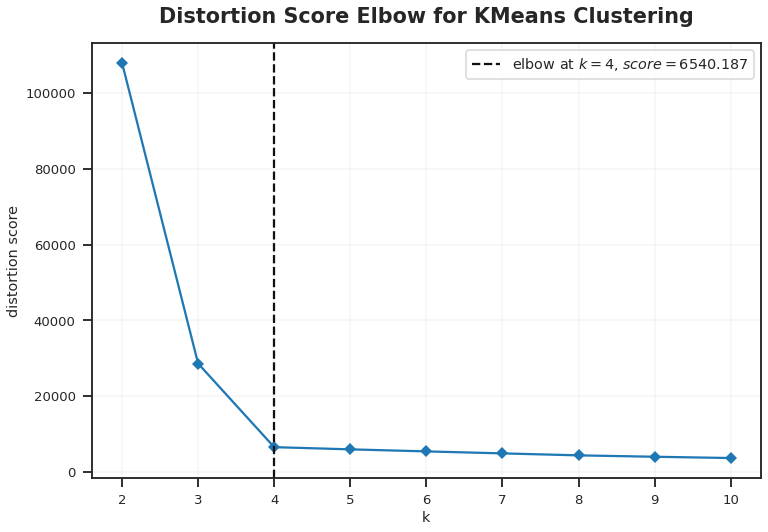

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [31]:
# kelbow_visualizer
kelbow_visualizer(KMeans(), X, k=10, timings=False)

A linha azul é a distorção, que nada mais é que soma das variâncias ao quadrado dentro de cada clustering. 

Poderia passar outra métrica, por exemplo silhouette

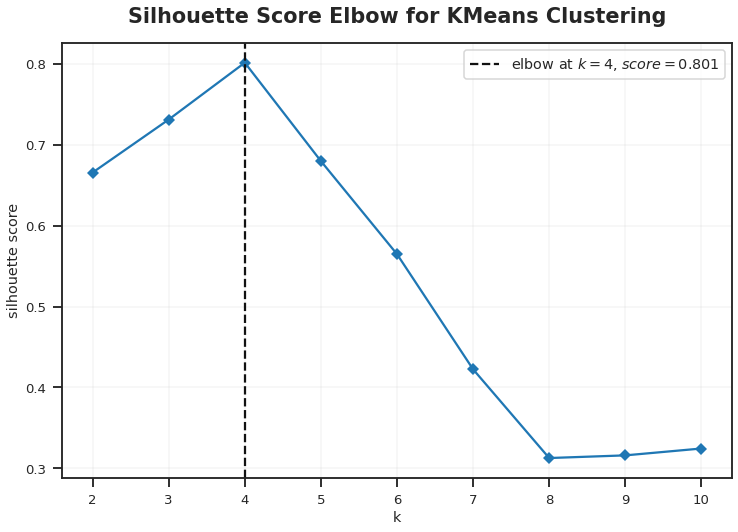

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>,
                 estimator=KMeans(n_clusters=10), metric='silhouette',
                 timings=False)

In [33]:
kelbow_visualizer(KMeans(), X, k=10, timings=False, metric= 'silhouette')

Por algum motivo tá sugerindo 3, porém o certo é o 4, essa sugestão não é interessante, pois são 4 itens reais.

Para fazer o gráfico de silhouette ele pede o modelo

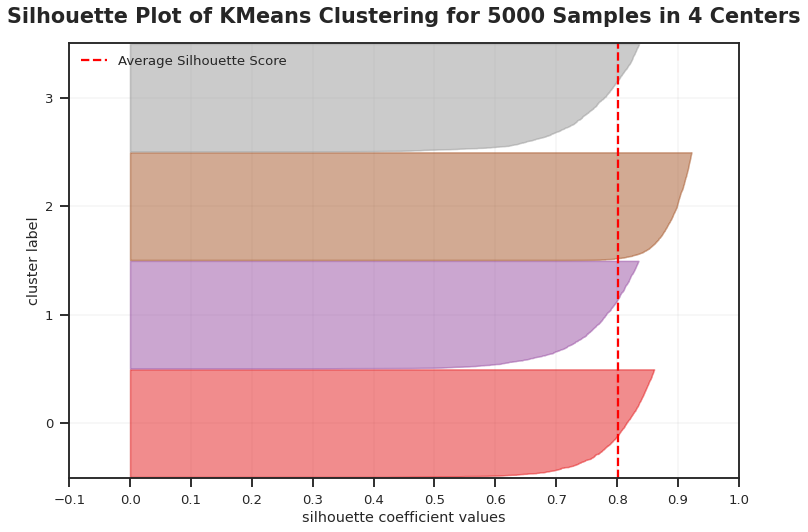

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 5000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=4))

In [34]:
# silhouette_visualizer
silhouette_visualizer(KMeans(n_clusters=4), X)

Nós temos acima 4 clustering, e pra cada cluster temos um coeficiente de silhouette que está no eixo x. O eixo y diz qual clustering que é. O clustering 0 ele tem valores que passam de 0.9, ou seja bem próximo de 1 e a média é aproximadamente 0.8. Ai é pra verificar qual clustering da o coeficiente de silhouette maior.

Agora vou fazer uma lista de dicionários com todos os coeficientes de métricas que estamos avaliando

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score --> tupla com métricas

cluster_metrics_results = [] --> lista vazia

Para cada k de 2 a 10 vou criar e rodar o modelo, vou gerar os labels, vou criar um dicionário e vou colocar a chave e o valor dentro da lista nula, na primeira interação k=2, vou colocar outra chave que vai ser inertia. Vou colocar outro loop pra poder fazer isso em todas as métricas

In [35]:
# Create list of dictionaries

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

cluster_metrics_results

[{'k': 2,
  'inertia': 107966.34539690384,
  'silhouette_score': 0.6656347785839535,
  'davies_bouldin_score': 0.4008172315008893,
  'calinski_harabasz_score': 9175.947228988125},
 {'k': 3,
  'inertia': 28602.015722668453,
  'silhouette_score': 0.7311436671808761,
  'davies_bouldin_score': 0.36632703309735515,
  'calinski_harabasz_score': 24247.920823404627},
 {'k': 4,
  'inertia': 6540.187170795527,
  'silhouette_score': 0.8013630564275173,
  'davies_bouldin_score': 0.2777899382406871,
  'calinski_harabasz_score': 76298.63892792861},
 {'k': 5,
  'inertia': 5962.792508758046,
  'silhouette_score': 0.6800325907760589,
  'davies_bouldin_score': 0.6469134734390327,
  'calinski_harabasz_score': 62877.65082978073},
 {'k': 6,
  'inertia': 5422.97376847988,
  'silhouette_score': 0.5346927356770591,
  'davies_bouldin_score': 0.9354138236656923,
  'calinski_harabasz_score': 55401.112412023016},
 {'k': 7,
  'inertia': 4928.230770328467,
  'silhouette_score': 0.420187574991817,
  'davies_bouldin_

In [36]:
# Create dataframe
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,107966.345397,0.665635,0.400817,9175.947229
3,28602.015723,0.731144,0.366327,24247.920823
4,6540.187171,0.801363,0.277790,76298.638928
5,5962.792509,0.680033,0.646913,62877.650830
6,5422.973768,0.534693,0.935414,55401.112412
7,4928.230770,0.420188,1.121121,50882.742477
8,4365.494824,0.314382,1.237062,49315.714922
9,3999.066444,0.321094,1.131355,47152.577969
10,3653.266323,0.325378,1.050926,45921.369836


Aonde está maior tem um azul mais intenso.

davies_bouldin_score é o contrário das outras métricas, nela quanto mais distante de 1 melhor. O calisnki tem que normalizar. Os "k" ele nem sempre são iguais pra todas as métricas, porém a diferença é algo próximo de 1 pra mais ou pra menos. A mais usada é a silhouette

.highlight_max(subset=['silhouette_score','calinski_harabasz_score']) mostra os valores mais altos da silhouette

In [37]:
# Style dataframe
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,107966.345397,0.665635,0.400817,9175.947229
3,28602.015723,0.731144,0.366327,24247.920823
4,6540.187171,0.801363,0.277790,76298.638928
5,5962.792509,0.680033,0.646913,62877.650830
6,5422.973768,0.534693,0.935414,55401.112412
7,4928.230770,0.420188,1.121121,50882.742477
8,4365.494824,0.314382,1.237062,49315.714922
9,3999.066444,0.321094,1.131355,47152.577969
10,3653.266323,0.325378,1.050926,45921.369836


Repetindo procedimento acima com dados aleatórios

In [38]:
# X_random with numpy
X_random = np.random.rand(*X.shape)
X_random

array([[0.50939693, 0.13065039],
       [0.90565082, 0.61644968],
       [0.99283665, 0.89873562],
       ...,
       [0.94072264, 0.1506389 ],
       [0.12635671, 0.59402029],
       [0.08300446, 0.86429531]])

Podemos ver que são duas features e várias linhas

Criando um scatterplot pra confitmar que os dados estão todos aleatórios

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

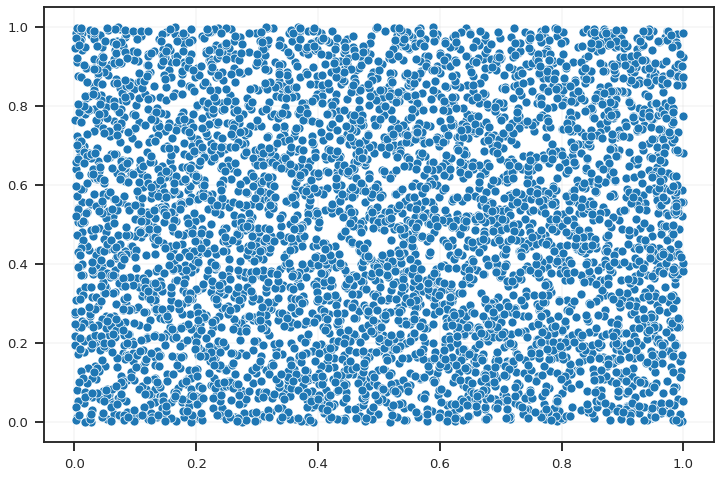

In [39]:
sns.scatterplot(X_random[:,0], X_random[:,1])

O que vai mudar é que eu não vou pegar o "X", vou pegar o X_random

In [40]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X_random)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X_random, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,526.942855,0.349384,1.191413,2964.305261
3,334.648477,0.374376,0.868079,3769.063801
4,214.566797,0.398311,0.779723,4850.126130
5,180.420876,0.384609,0.844526,4561.559680
6,152.599196,0.370357,0.868688,4495.796289
7,128.683312,0.368906,0.812658,4596.502990
8,107.594959,0.368389,0.802490,4850.953063
9,92.701447,0.371508,0.762756,5025.785916
10,84.937349,0.370081,0.817061,4925.505955


In [41]:
# Style dataframe
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,526.942855,0.349384,1.191413,2964.305261
3,334.648477,0.374376,0.868079,3769.063801
4,214.566797,0.398311,0.779723,4850.126130
5,180.420876,0.384609,0.844526,4561.559680
6,152.599196,0.370357,0.868688,4495.796289
7,128.683312,0.368906,0.812658,4596.502990
8,107.594959,0.368389,0.802490,4850.953063
9,92.701447,0.371508,0.762756,5025.785916
10,84.937349,0.370081,0.817061,4925.505955


Comparando de forma interativa

In [42]:
@interact(k=(2,11), data=['X','X_random'])
def plot_kmeans(k, data):
  data = X if data=='X' else X_random
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(data)
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels, **scatter_kwargs)

interactive(children=(IntSlider(value=6, description='k', max=11, min=2), Dropdown(description='data', options…

Se os dados tiverem muitas colunas deve-se aplicar o método High Dimensional Data. Vou simular com apenas 1 mil linhas e 10 colunas, 4 clustering e o desvio padrão de 0.8 

In [43]:
# Simulate clusters with high dimensional data
X_dim,y_dim = datasets.make_blobs(n_samples=int(1E3), n_features=10, centers=4, cluster_std=.8, random_state=0)
df_dim = pd.DataFrame(X_dim, columns=list(string.ascii_uppercase[:X_dim.shape[1]]))
df_dim.head()

,A,B,C,D,E,F,G,H,I,J
0,1.375988,3.328840,2.252246,0.163276,-2.048389,1.498086,-1.626945,7.672603,9.713141,-2.330450
1,-4.778629,5.591210,-0.834382,0.333095,-10.125881,3.179277,2.914841,1.443623,9.603470,5.607201
2,11.184614,5.196295,-0.802285,5.042595,-7.432989,3.606461,-7.730530,8.711666,1.110940,-1.709037
3,9.696156,5.280882,-1.214031,4.589872,-8.312332,3.070013,-6.423507,9.210979,1.207334,-1.770543
4,-4.262755,4.842532,-0.878987,1.944770,-8.669946,2.534408,2.236930,0.444544,8.682765,3.178775


Vamos olhar a distribuição desses dados aplicando a técnica PCA, que visa diminuir a quantidade de colunas mantendo a informação sobre a variância das variáveis

O PCA dá a quantidade de compronentes que quer, por padrão considera as 10 colunas

In [44]:
# Apply PCA
pca = PCA()
pca_components = pca.fit_transform(df_dim)

df_pca = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-5.856883,3.122523,6.136654,-0.686487,0.347968,-0.618029,-0.467717,-0.505754,-0.563464,0.814840
1,-11.436590,-6.559320,-4.410817,-1.239685,-0.029943,1.017996,0.895097,-0.878642,-0.584850,-0.537870
2,6.443283,9.334398,-3.091811,-1.298623,-0.771382,0.358402,0.372171,-0.301598,-1.050753,0.198899
3,5.114664,8.403564,-3.589742,-1.178399,-0.325189,-0.178110,-0.224107,-0.534450,0.190508,0.744221
4,-10.328252,-5.222973,-3.462066,0.586746,-0.655750,1.066886,-0.717080,0.606951,-1.759044,0.041215


Se quiser retornar só três coluna, usa no código acima pca = PCA(n_components=3)

Mostrando quanto de variância tem. O primeiro componente PC1 explica 55.33 % de toda variância de todo dataset

In [45]:
# Verify explained variance
pd.DataFrame(
    {'explained_var': pca.explained_variance_ratio_, 'explained_var_cumsum': pca.explained_variance_ratio_.cumsum()},
    index=df_pca.columns
)

,explained_var,explained_var_cumsum
PC1,0.553295,0.553295
PC2,0.307542,0.860836
PC3,0.108453,0.969289
PC4,0.004899,0.974188
PC5,0.004765,0.978953
PC6,0.004509,0.983462
PC7,0.004389,0.987851
PC8,0.004282,0.992133
PC9,0.004086,0.996219
PC10,0.003781,1.000000


Se observar a tabela acima, se eu pegar apenas PC1, PC2 e PC3, eles explicam em 96.93 % da variância dos dados, por este motivo não é necessário trabalhar com todas as colunas. Isso é útil pra poder plotar

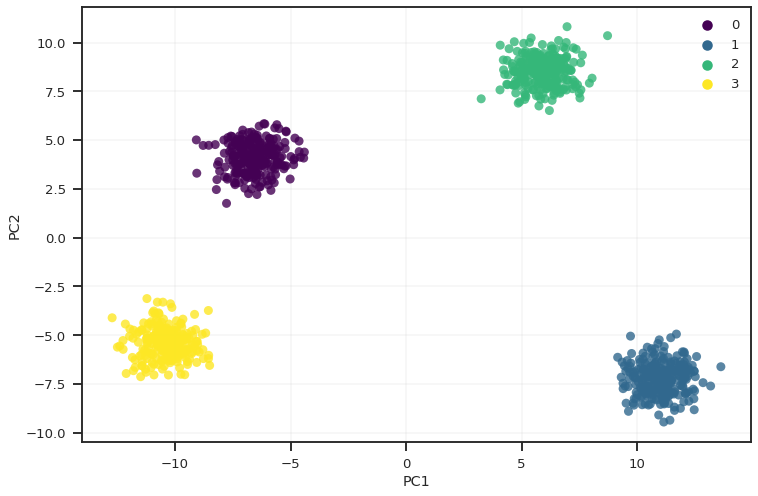

In [46]:
# Plot PCA with true label
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs);

Posso fazer um Kmeans com os dados do PCA. Vou usar a função ao invés da classe.

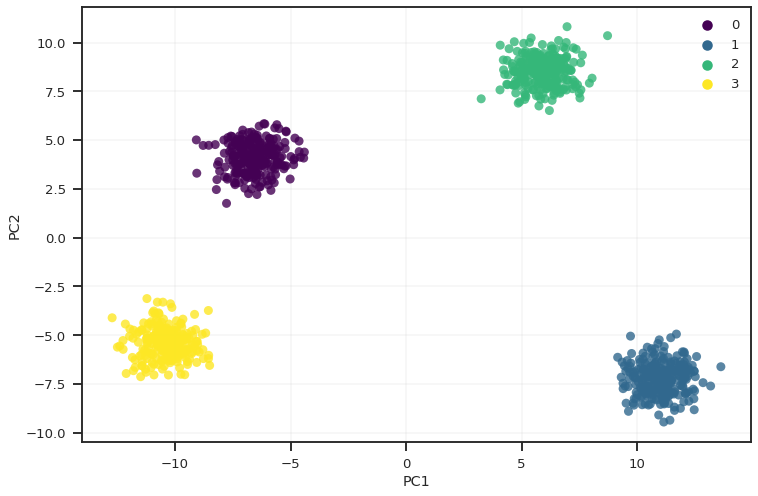

In [47]:
# Plot PCA with k-means label
labels = k_means(df_pca.iloc[:,:3], 4)[1]
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs);

Podemos fazer um gráfico 3D, já que usei 3 colunas

In [48]:
# 3D PCA plot
px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color=labels, template='plotly_dark')

O PCA pode ser usado para reduzir dimensão de dados e depois aplicar o Kmeans.